In [1]:
from mlgrad.risk import ERisk, ERiskGB
from mlgrad.loss import SquareErrorLoss
from mlgrad.model import LinearFuncModel, SigmaNeuronModel, FFNetworkModel, \
                        FFNetworkFuncModel, SigmaNeuronModelLayer, LinearModel
from mlgrad.func import SoftPlus, Sqrt, Sigmoidal, HingeSqrt, Arctang

from mlgrad import erm_fg, erm_irgd, fg, erm_fg, erisk
from mlgrad.regr import m_regression_irls
from mlgrad.af import averaging_function
from mlgrad.weights import MWeights

import numpy as np

In [2]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [3]:
X, Y = datasets.load_breast_cancer(return_X_y=True)
N = len(X)
Y = 2.0*Y-1.0
print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

(569, 30) float64
(569,) float64


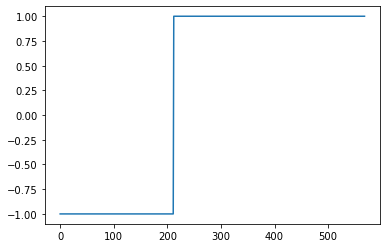

In [4]:
plt.plot(sorted(Y))
plt.show()

In [5]:
X_o = preprocessing.scale(X)
Y_o = Y.copy()

In [6]:
from mlgrad.boost.gb_classification import gb_fit, gb_fit_agg

def new_model(n):
    mod = SigmaNeuronModel(Sigmoidal(0.5), n)
    mod.init_param()
    return mod

m = 50

In [7]:
gb = gb_fit(X_o, Y_o, new_model, h=0.001, n_iter=m, n_iter2=3)
lfm, lvals = gb.complex_model, gb.lvals

In [8]:
print(np.asarray(lfm.weights))

[0.99999999 1.97513161 0.23371181 0.38330525 0.65143508 0.89301588
 0.81095613 0.86977649 0.82089384 0.85459575 0.83284804 0.86920289
 0.90287805 0.8874197  0.93732958 0.89556196 0.90140832 0.48053771
 0.55846801 0.36755077 0.58327456 0.51410294 0.30541723 0.5773989
 0.56184678 0.6007889  0.70010201 0.72404928 0.42473826 0.74054748
 0.72200765 0.79866099 0.64678982 0.9387982  1.00188998 0.86870395
 0.78807758 0.92344504 0.52466653 0.31647609 0.50921268 0.31047072
 0.95990003 0.69222816 0.85778627 0.63194599 0.92817727 0.76328515
 0.95185529 0.43100904]


In [9]:
alpha=0.98
# gb_agg = gb_fit_agg(X_o, Y_o, new_model, aggname='WM', alpha=alpha, h=0.01, n_iter=m, n_iter2=3)
# lfm_agg, lvals_agg = gb_agg.complex_model, gb_agg.lvals

In [10]:
print(lvals)

[1.0, 1.7512559037264603, 0.045149271138926, 0.029727596335153133, 0.026881615363478405, 0.02428241457180941, 0.039331331169556935, 0.03814546011617302, 0.03924898294258199, 0.04031627961134487, 0.042289093019389906, 0.024127710960138563, 0.019791373055569546, 0.042551933627031316, 0.026046095683182002, 0.019105674405702454, 0.016986482197494747, 0.016281181777632, 0.01590593711303622, 0.016348650545280525, 0.015130457219972294, 0.01617809646081317, 0.014372636598006642, 0.014723180999245187, 0.014736689691268364, 0.014465391948407605, 0.014599045063683477, 0.013330094807616873, 0.012775911714497327, 0.014924546424216267, 0.013869991469155683, 0.018566157998108696, 0.01670656197800973, 0.014697802951658057, 0.02918344557257002, 0.016197341913565356, 0.01323091860464254, 0.019493184234228005, 0.007360598996628132, 0.01146577614118569, 0.010838183623279502, 0.009340182337021451, 0.010326738855490188, 0.017072163528440588, 0.014672224616058688, 0.005462322689527396, 0.009839086295783511, 

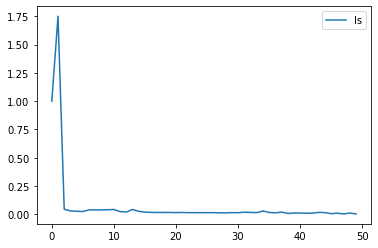

In [11]:
plt.plot(lvals, label='ls')
# plt.plot(lvals_agg, label='wm')
plt.legend()
# plt.savefig('calhousing_%.0f_lvals.eps' % (alpha*100,))
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


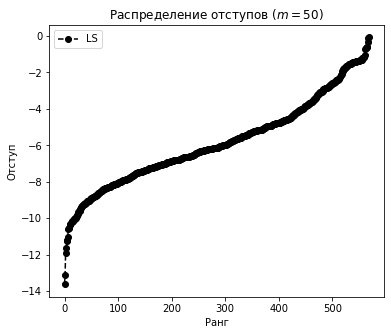

In [12]:
plt.figure(figsize=(6,5))
plt.xlabel('Ранг')
plt.ylabel('Отступ')
plt.title("Распределение отступов ($m=$%s)" % m)
plt.plot(sorted([-lfm(X_o[k]) * Y_o[k] for k in range(N)]), linestyle='--', color='k', marker='o', label='LS')
# plt.loglog(sorted([-lfm_agg(X_o[k]) * Y_o[k] for k in range(N)]), linestyle='-', color='k', marker='o', label=r"WM($\alpha$=%.2f)" % alpha)
plt.legend()
plt.savefig('cancer_%.0f_%s_errors.eps' % (alpha*100,m))
# plt.ylim(-0.1,1)
plt.show()

In [13]:
Y_ls = lfm.evaluate_all(X_o)
# Y_agg = lfm_agg.evaluate_all(X_o)

In [14]:
acc_ls = metrics.accuracy_score(Y_o, np.sign(Y_ls))
# acc_wm = metrics.accuracy_score(Y_o, np.sign(Y_agg))
# print(acc_ls, acc_wm)
print(acc_ls)

1.0
